In [1]:
import cv2
from PIL import Image, ImageDraw
import sys
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from src.model import preprocessing, postprocessing

In [2]:
# define device id & model path
device_id = 0
model_path = "model/yolov5s.om"

# define image & coco_names path
img_path = "../../Common/data/person.jpg"
coco_names_path = "../../Common/data/coco.names"

In [3]:
with open(coco_names_path) as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
# initialize acllite library
acl_resource = AclLiteResource()
acl_resource.init()

# load *.om model
model = AclLiteModel(model_path, device_id)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 408000
malloc output 1, size 1632000
malloc output 2, size 6528000
Create model output dataset success
Init model resource success


In [5]:
# read image
img_org_bgr = cv2.imread(img_path)

In [6]:
# 1) pre-processing stage
data = preprocessing(img_org_bgr,model._model_desc)

model input size 1
input  0
model input dims ({'name': 'x', 'dimCount': 4, 'dims': [1, 12, 320, 320]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'output_0_trans_Cast_206_0', 'dimCount': 5, 'dims': [1, 20, 20, 3, 85]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'output_1_trans_Cast_207_0', 'dimCount': 5, 'dims': [1, 40, 40, 3, 85]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'output_2_trans_Cast_208_0', 'dimCount': 5, 'dims': [1, 80, 80, 3, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [7]:
# 2) model execution(forward) stage
result_list = model.execute([data,])

In [8]:
# 3) post-processing the raw predictions
bboxes = postprocessing(result_list,img_org_bgr,coco_labels)

In [9]:
img_out = Image.open(img_path)
img1 = ImageDraw.Draw(img_out)
for idx,bbox in enumerate(bboxes):
    img1.rectangle(list(bbox[0]), outline ="red", width=2)
    print(bbox[0], bbox[1], int(bbox[2]), coco_labels[int(bbox[2])])

[188.984375, 93.78515625, 275.078125, 383.62890625] 0.933837890625 0 person
[397.8125, 137.4169921875, 601.5625, 337.9267578125] 0.8166351318359375 18 sheep
[59.921875, 254.82958984375, 206.640625, 354.67041015625] 0.8477516174316406 16 dog


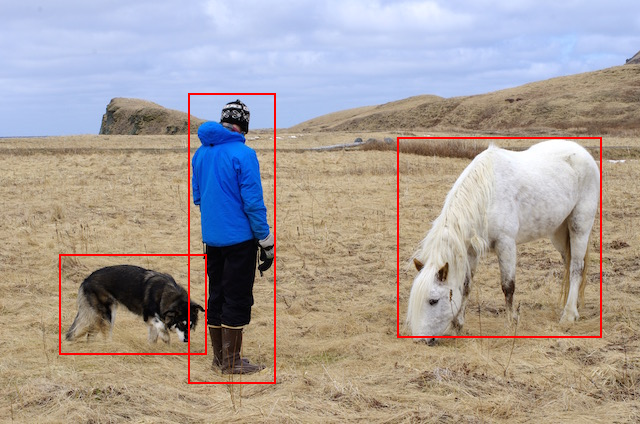

In [10]:
img_out